# Micro Credit Dafault Prediction


###### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
train_df = pd.read_csv("Data file.csv")

In [4]:
train_df.head(5)

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [5]:
train_df["Unnamed: 0"].nunique()

209593

In [6]:
train_df.shape

(209593, 37)

In [7]:
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
train_df

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 36 columns]

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

As we can see there is no null values present in data set, whereas 3 columns are of objest datatypes. we will treat them further.

In [14]:
train_df.label.value_counts().plot.bar()

<AxesSubplot:>

Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [12]:
train_df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

In [23]:
microlst = [train_df]
for column in microlst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'No balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'Low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'Average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'High balance'

In [32]:
count_balance_response = pd.crosstab(train_df['label'],train_df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response = count_balance_response.transpose()
print(count_balance_response.transpose())

balance_group  Average balance  High balance  Low balance  No balance
label                                                                
0                     9.436834           0.0    11.276328   30.710929
1                    90.563166         100.0    88.723672   69.289071


In [25]:
bal = pd.DataFrame(train_df['balance_group'].value_counts())
bal['% Subscription'] = count_balance_response[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

In [41]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('blue'),
                                               figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot shows that how customers with different main balance levels are paying back the loan with in five days. The high balance level people are with 100% rate i.e they are paying loan within 5 days. Coming to the average and low balance people it is observed that around 10%-12% of people are not paying the loan within 5 days.
Coming to No balance level people, it is observed that around 30% of people are not paying back the loan with in stipulated 5 days of time. The 30% of people with no balance or negative balance people are creating a major loss to the company without paying back the loan within five days of time.

In [27]:
microlst = [train_df]
for column in microlst:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'No frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'Low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'Medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'High frequency'

In [28]:
count_fre_response = pd.crosstab(train_df['label'],train_df['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response = count_fre_response.transpose()

In [31]:
print(count_fre_response.transpose())

frequency_group  High frequency  Low frequency  Medium frequency  No frequency
label                                                                         
0                       5.48104       4.304873          3.787999     24.870684
1                      94.51896      95.695127         96.212001     75.129316


In [34]:
fre = pd.DataFrame(train_df['frequency_group'].value_counts())
fre['% Subscription'] = count_fre_response[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

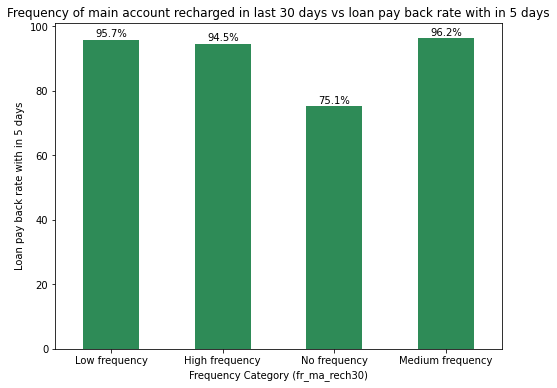

In [36]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('seagreen'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot shows that how customers with different frequency levels i.e. main account recharge are paying back the loan within five days. The is no 100% rate in any of the frequency levels to pay back the loan within 5 days. Coming to the average and low & medium frequency people it is observed that around 5% - 6% of people are not paying the loan within 5 days.
Coming to no frequency level people, it is observed that around 25% of people are not paying back the loan with in stipulated 5 days of time. The 25% people who are not getting their main account recharge for 30 days creating a major loss to the company without paying back the loan within five days of time.

In [42]:
microlst = [train_df]
for column in microlst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'No loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'Low loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'Medium loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'High loans'

In [44]:
count_loan_response = pd.crosstab(train_df['label'],train_df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response = count_loan_response.transpose()
print(count_loan_response.transpose())

loan_frequency_group  High loans  Low loans  Medium loans  No loans
label                                                              
0                       1.619592  23.972816      6.401495       0.0
1                      98.380408  76.027184     93.598505     100.0


In [46]:
fre = pd.DataFrame(train_df['loan_frequency_group'].value_counts())
fre['% Subscription'] = count_loan_response[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

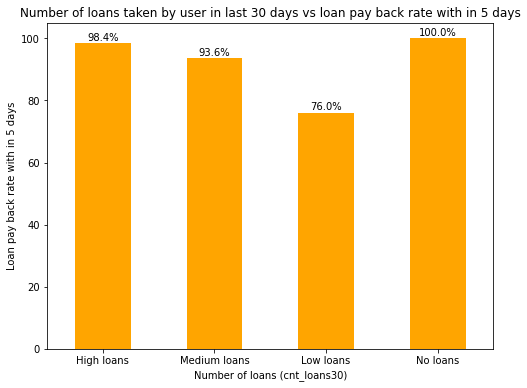

In [70]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('orange'), figsize = (8,6))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Number of loans (cnt_loans30)')
plt.xticks(rotation = 'horizontal')

#label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')
#     plot_fre.text(rec.get_width()+5, 
#                   rec.get_y()+ rec.get_height()-0.3, 
#                   label+'%', 
#                   ha = 'center') 
#                   #va='bottom')


The above bar plot shows that how customers with different loan levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.
Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the low number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from high number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In [71]:
microlst = [train_df]
for column in microlst:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'No loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'Low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'Medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'High amnt of loans'

In [72]:
count_loanamnt_response = pd.crosstab(train_df['label'],train_df['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response = count_loanamnt_response.transpose()

In [73]:
fre1 = pd.DataFrame(train_df['loanamnt_frequency_group'].value_counts())
fre1['% Subscription'] = count_loanamnt_response[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

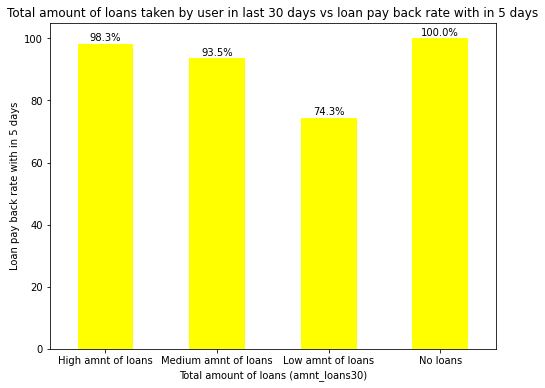

In [74]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('yellow'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot shows that how customers with different loans levels in terms of amount taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.
Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the low amount level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people taken high amount of loans are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

As 'msisdn', 'pcircle', 'pdate' features are not having much importance, we can ignore them. And also removing the extra columns created for the EDA part.

In [75]:
train_df.drop(['msisdn', 'pcircle', 'pdate','balance_group','frequency_group',
               'loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
train_df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0

<AxesSubplot:>

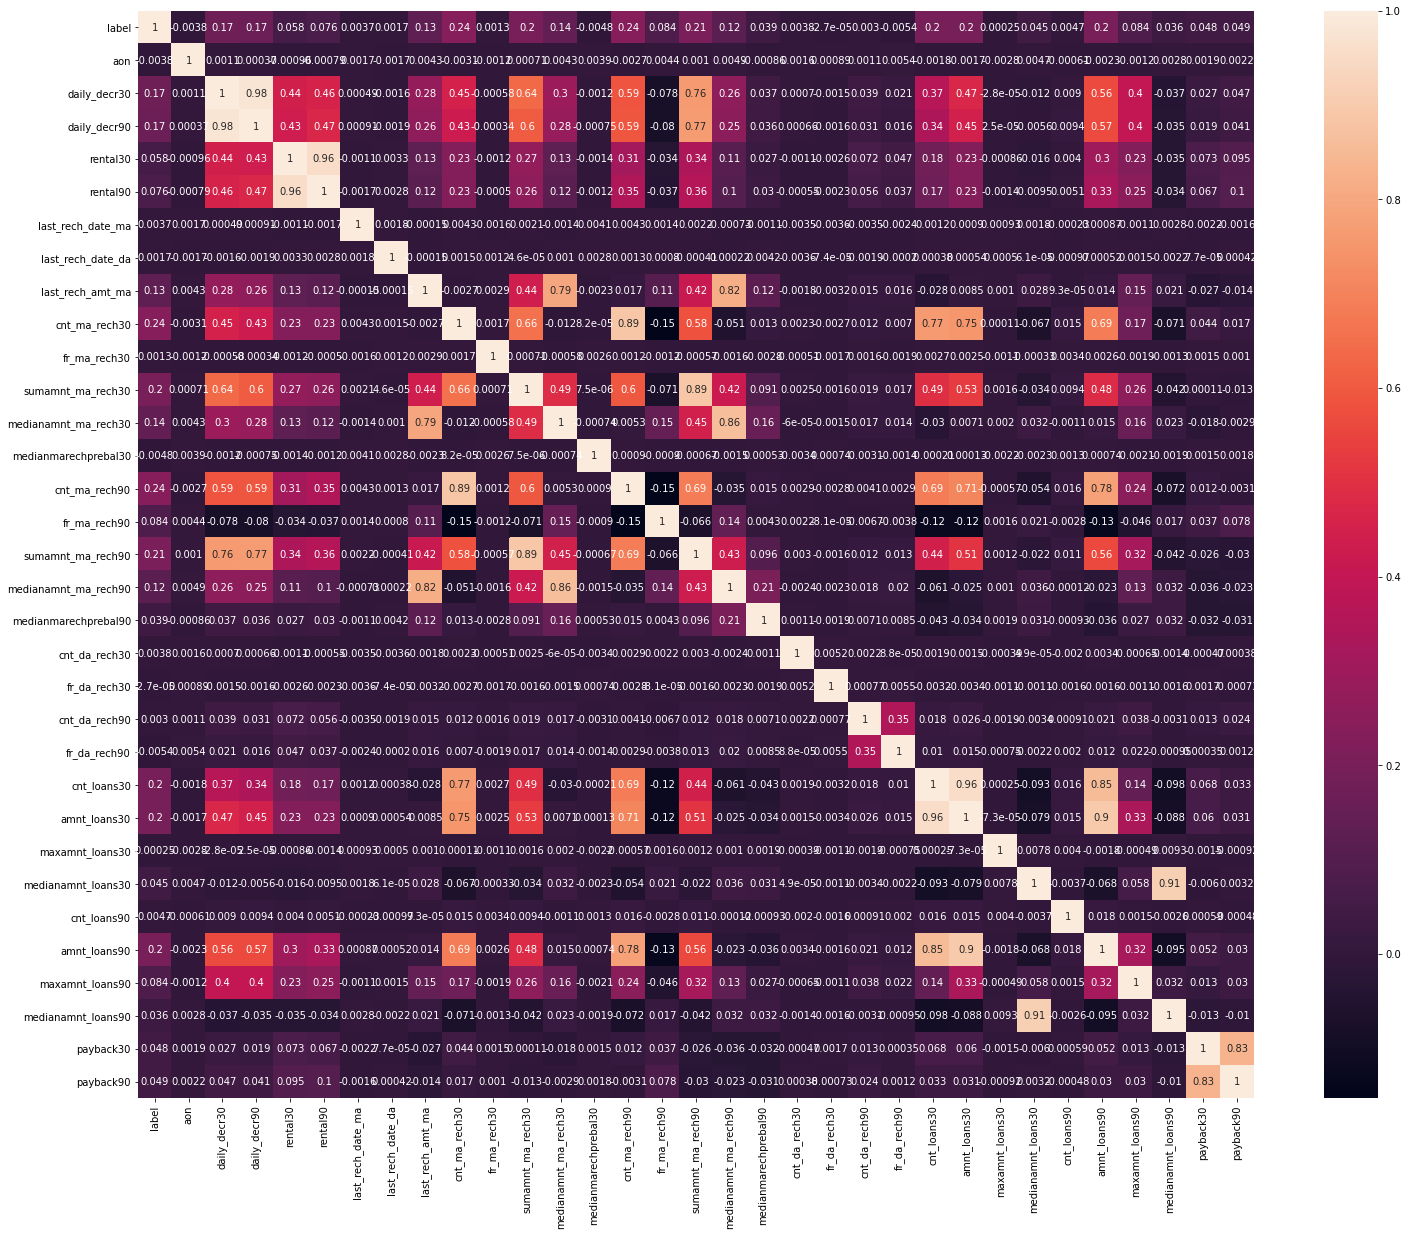

In [84]:
corr_data = train_df
corr = corr_data.corr()
corr
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True,annot_kws={'size':10})

The above matrix shows there is multicollinearity among many componants so first need to deal with that.

#### Cheking normality of the features:

In [85]:
df2 = train_df.copy()

In [87]:
df2.drop(['last_rech_date_da','fr_da_rech30','maxamnt_loans30','medianamnt_loans30','maxamnt_loans90',
          'medianamnt_loans90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90'],axis=1,inplace=True)

In [88]:
columns = df2.columns

In [89]:
columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90'],
      dtype='object')

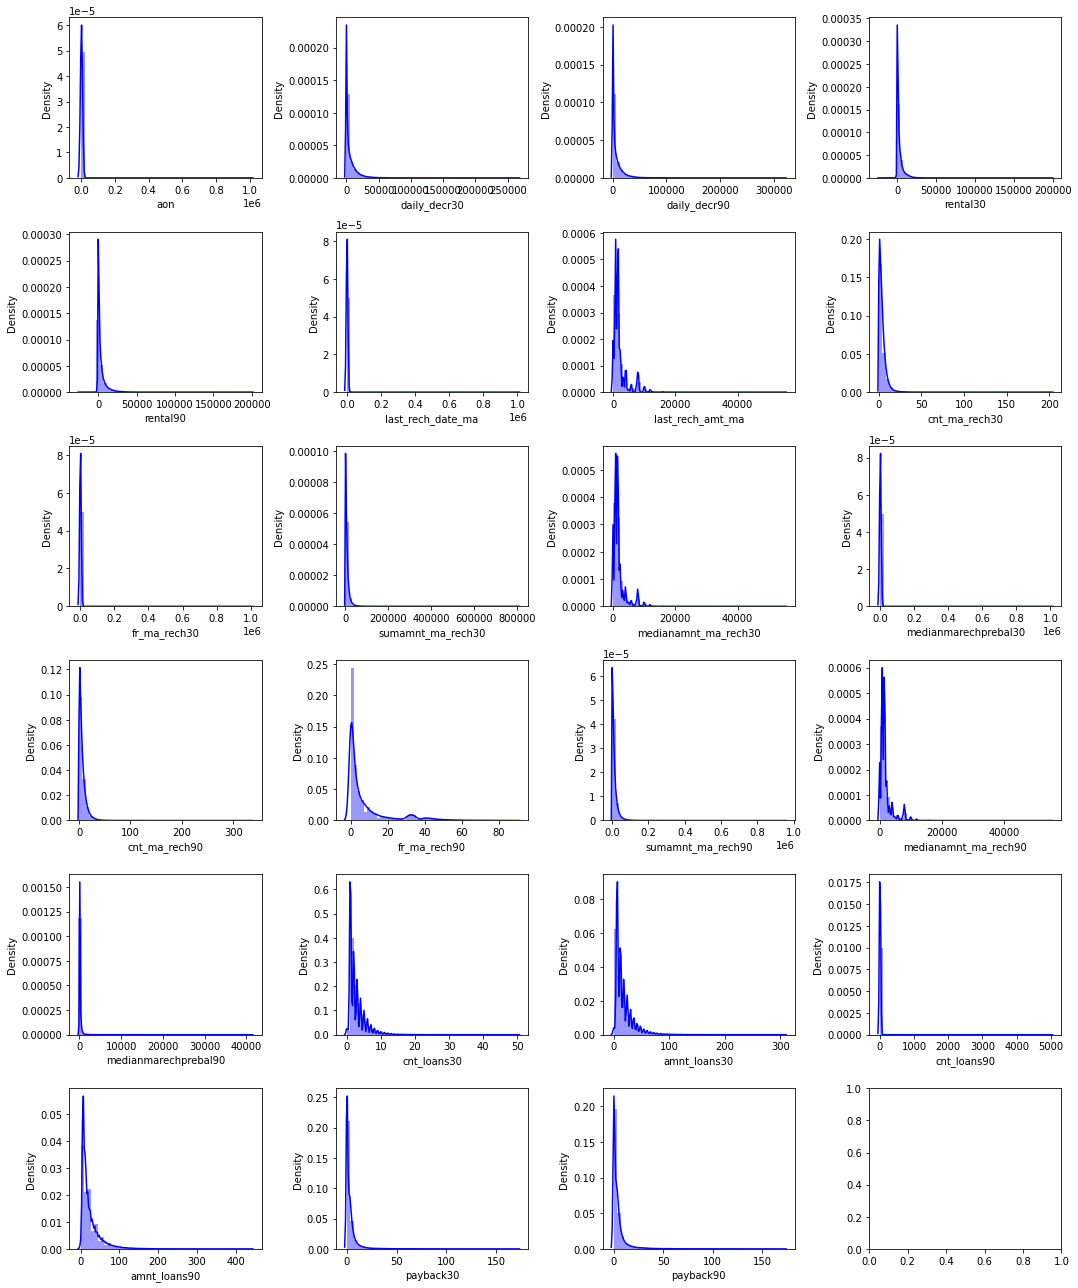

In [93]:
columns = (['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90'])
fig,ax = plt.subplots(6,4,figsize=(15,18))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df2[col],ax=ax[i],color='blue')
plt.tight_layout()
plt.show()

### Outlier Transformation:

In [97]:
from scipy.stats import zscore
df3 = train_df.copy()
df3

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0

In [98]:
df3.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [99]:
columns = (['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'])
for i in range(len(columns)):
    df3[columns[i]] = zscore(df3[columns[i]])
    for j in range(len(df3[columns[i]])):
        if df3[columns[i]][j]>3 or df3[columns[i]][j]<-3:
            df3[columns[i]].replace(df3[columns[i]][j],df3[columns[i]].median(),inplace=True)
    df3[columns[i]] = np.cbrt((df3[columns[i]]))

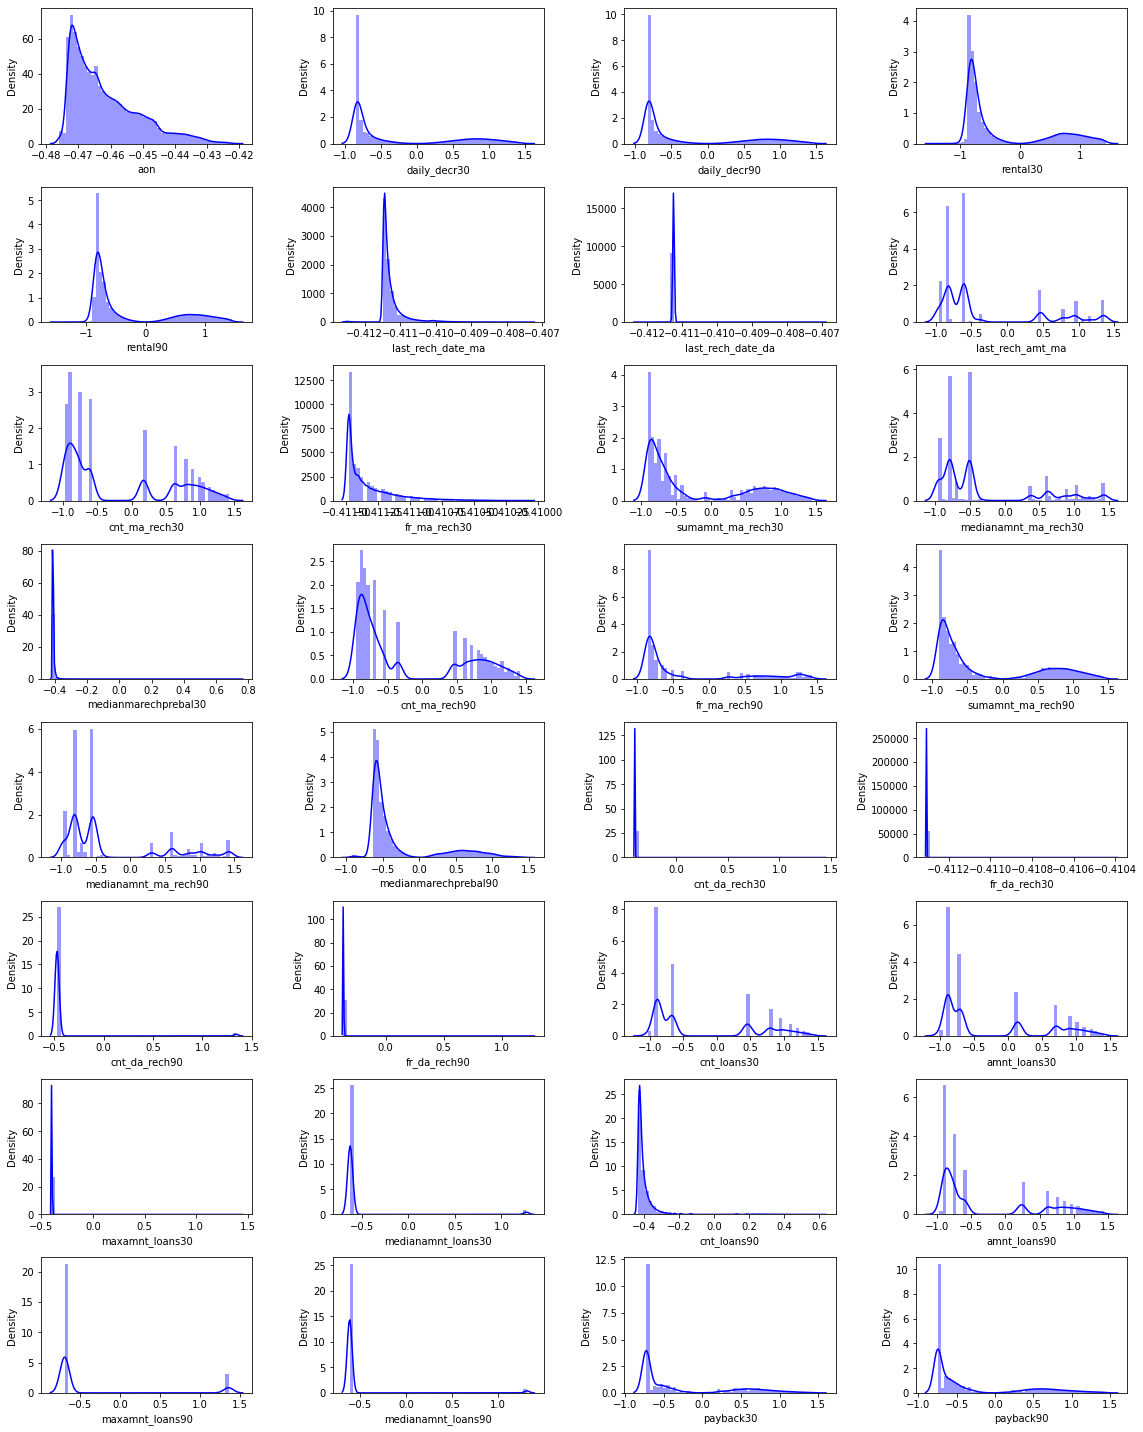

In [101]:
columns = (['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90','payback30', 'payback90'])
fig, ax = plt.subplots(8,4,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df3[col],ax=ax[i],color='blue')
plt.tight_layout()
plt.show()

There are outliers for many variables in the data set.
By observing these features, I found way of doing an outlier’s imputation technique for the data of the features whose z-score >3. There are many ways to deal with outliers such as imputing outlier’s with mean, median, mode (categorical), k-NN imputation, mice imputation or simply removing and others.


For this data set I simply choose mean for imputing the outliers with the respective features. After performing mean, I also applied cube root for the data to bring data closer as to make the distribution normal.
After performing the mean imputation and also applying cube root to the data become so what normally distributed compared to the data which haven’t undergone any type of imputation or outlier transformation.


So, outlier imputation is far better than simply removing the outliers from the data. As the data set belongs to the loan defaulters or not the outliers are also important for us to get the unbiased results after performing machine learning algorithms.

In [102]:
df3.drop(['label'],axis=1,inplace=True)

In [103]:
df3


aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.469628     -0.631886     -0.651355 -0.830994 -0.823561   
1      -0.460673      0.900837      0.820996  0.614277  0.330255   
2      -0.464317     -0.755959     -0.754218 -0.746514 -0.764987   
3      -0.470246     -0.834590     -0.821858 -0.837741 -0.832051   
4      -0.455745     -0.827820     -0.815968 -0.717832 -0.744840   
...          ...           ...           ...       ...       ...   
209588 -0.466978     -0.827754     -0.815910 -0.719287 -0.745850   
209589 -0.453015     -0.833774     -0.821147 -0.607129 -0.672501   
209590 -0.454341      0.888238      0.810890  0.902695  0.978717   
209591 -0.438454      0.916865      0.840875 -0.808937 -0.756558   
209592 -0.441886     -0.459066     -0.521399 -0.800323 -0.790661   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               -0.411415          -0.411243         -0.605175      -0.774598   
1               -0.410757          -0.411243          1.162295      -0.887785   
2               -0.411379          -0.411243         -0.605175      -0.887785   
3               -0.409986          -0.411243         -0.778238      -0.977733   
4               -0.411342          -0.411243          0.468983       0.892125   
...                   ...                ...               ...            ...   
209588          -0.411452          -0.411243          0.942288      -0.612517   
209589          -0.411342          -0.411243         -0.816700       0.172753   
209590          -0.411379          -0.411243         -0.605175       0.621545   
209591          -0.411415          -0.409835         -0.816700       0.621545   
209592          -0.411013          -0.411243          1.320712      -0.774598   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          -0.410708  ...    -0.667281     -0.699639        -0.398504   
1          -0.411480  ...    -0.883050     -0.699639        -0.395515   
2          -0.411480  ...    -0.883050     -0.882673        -0.398504   
3          -0.411480  ...    -0.667281     -0.699639        -0.398504   
4          -0.411407  ...     1.184100      1.114326        -0.398504   
...              ...  ...          ...           ...              ...   
209588     -0.411407  ...    -0.667281     -0.699639        -0.398504   
209589     -0.411444  ...     0.455249      0.140282        -0.398504   
209590     -0.411187  ...     0.786124      1.114326        -0.395515   
209591     -0.411333  ...    -0.667281      0.140282        -0.395515   
209592     -0.411444  ...    -0.667281      0.140282        -0.395515   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                -0.628102    -0.418872     -0.760562        -0.693970   
1                -0.628102    -0.427158     -0.760562         1.360402   
2                -0.628102    -0.427158     -0.873562        -0.693970   
3                -0.628102    -0.418872     -0.760562        -0.693970   
4                -0.628102    -0.371449      0.885112        -0.693970   
...                    ...          ...           ...              ...   
209588           -0.628102    -0.418872     -0.760562        -0.693970   
209589           -0.628102    -0.410244     -0.597468        -0.693970   
209590           -0.628102    -0.381899      1.046706         1.360402   
209591           -0.628102    -0.410244      0.237500         1.360402   
209592           -0.628102    -0.418872     -0.597468         1.360402   

        medianamnt_loans90  payback30  payback90  
0                -0.612332   1.426813   1.337767  
1                -0.612332  -0.727875  -0.748431  
2                -0.612332  -0.727875  -0.748431  
3                -0.612332  -0.727875  -0.748431  
4                -0.612332  -0.494459  -0.577773  
...                    ...        ...        ...  
209588           -0.612332  -0.648057  -0.685569  
209589           -0.612332  -0.648057  -0.685569 

## Varience Inflation Factor

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [105]:
vif= pd.DataFrame()
vif['Features'] = df3.columns
vif['vif']=[variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]
vif[vif['vif']>4]

Features           vif
0                    aon  1.964279e+03
1           daily_decr30  1.249489e+01
2           daily_decr90  1.301443e+01
3               rental30  6.177588e+00
4               rental90  6.725150e+00
5      last_rech_date_ma  1.738138e+06
6      last_rech_date_da  4.392088e+06
8          cnt_ma_rech30  4.512458e+00
9           fr_ma_rech30  6.074839e+06
10     sumamnt_ma_rech30  4.333607e+00
11  medianamnt_ma_rech30  5.734394e+00
12  medianmarechprebal30  2.943865e+02
13         cnt_ma_rech90  4.905583e+00
15     sumamnt_ma_rech90  4.881437e+00
16  medianamnt_ma_rech90  5.502455e+00
18         cnt_da_rech30  1.306652e+02
19          fr_da_rech30  1.283496e+07
20         cnt_da_rech90  6.944596e+00
21          fr_da_rech90  9.372600e+01
22           cnt_loans30  1.011724e+01
23          amnt_loans30  1.225684e+01
24       maxamnt_loans30  1.421631e+02
25    medianamnt_loans30  9.180847e+00
26           cnt_loans90  3.010675e+01
27          amnt_loans90  5.103061e+00
29    medianamnt_loans90  9.698635e+00
30             payback30  4.042264e+00

From the above results we can infer that the many features are having strong multicollinearity in the data set. This resembles that there is need to go for PCA (Principal Component Analysis).
If we won’t perform PCA the noise or correlation between the independent variables will affect the model prediction and model results. More than 50% of the features are having vif >4 so it is mandatory to perform PCA in order to reduce the multicollinearity effect among the independent variables.

## Principle Component Analysis

In [106]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA()
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
pca_data = pca.transform(df3)

In [109]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.36391966, 0.52144892, 0.61602579, 0.69386225, 0.74559359,
       0.78850652, 0.82671891, 0.8573575 , 0.88059873, 0.90160426,
       0.91891882, 0.93554025, 0.94951119, 0.95907565, 0.96661809,
       0.97358484, 0.97978258, 0.98574356, 0.99077737, 0.99398195,
       0.99656523, 0.9990396 , 0.99956725, 0.99970611, 0.99982433,
       0.99993338, 0.9999894 , 0.99999998, 0.99999999, 1.        ,
       1.        , 1.        ])

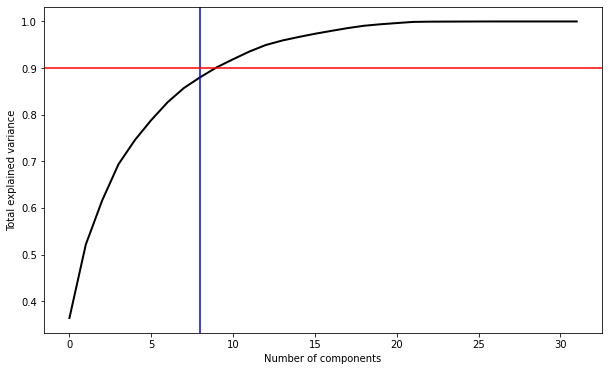

In [110]:
plt.figure(figsize=(10,6))

plt.plot(range(0,32), cumsum, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(8, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [113]:
covar_matrix = np.cov(df3.T)
print('Covariance Matrix \n%s', covar_matrix)

Covariance Matrix 
%s [[ 1.10530498e-04  5.96454189e-04  5.75228095e-04 ... -4.78234527e-06
   1.28083927e-04  2.12521954e-04]
 [ 5.96454189e-04  5.63641611e-01  5.24437527e-01 ... -5.15869914e-03
   8.82617731e-02  8.98069755e-02]
 [ 5.75228095e-04  5.24437527e-01  5.39783777e-01 ... -5.05175907e-03
   8.23727485e-02  8.66554290e-02]
 ...
 [-4.78234527e-06 -5.15869914e-03 -5.05175907e-03 ...  9.75001146e-02
  -2.13322228e-03  1.83662697e-03]
 [ 1.28083927e-04  8.82617731e-02  8.23727485e-02 ... -2.13322228e-03
   3.82551451e-01  3.02046363e-01]
 [ 2.12521954e-04  8.98069755e-02  8.66554290e-02 ...  1.83662697e-03
   3.02046363e-01  3.81340038e-01]]


In [114]:
eig_vals, eig_vecs = np.linalg.eig(covar_matrix)

In [115]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]


In [116]:
total = sum(eig_vals)
var_exp = [( i /total ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 36.3919656   52.14489233  61.60257885  69.38622504  74.55935929
  78.85065208  82.67189093  85.73574993  88.05987331  90.16042587
  91.89188187  93.55402535  94.95111868  95.90756548  96.66180918
  97.35848436  97.97825841  98.57435551  99.07773656  99.39819526
  99.65652321  99.90395993  99.95672484  99.97061126  99.98243319
  99.99333796  99.99894003  99.99999839  99.99999935  99.99999973
 100.         100.        ]


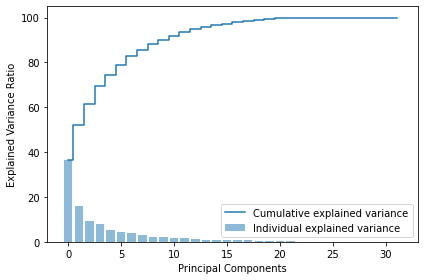

In [117]:
plt.figure(figsize=(6 , 4))
plt.bar(range(32), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(32), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

From the above results it is observed that 90% of the data is covered at the pca components (n=13). So total number of pca components were taken as 13.

In [118]:
pca = PCA(n_components=13)
pca.fit(df3)
data_pca = pd.DataFrame(pca.transform(df3))
data_pca.shape

(209593, 13)

## Model Selection

In [119]:
X = data_pca
y = train_df['label']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(125755, 13)
(83838, 13)
(125755,)
(83838,)


## Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
print('Training score =', logreg.score(X_train, y_train))
print('Test score =', logreg.score(X_test, y_test))

Training score = 0.8762832491749831
Test score = 0.8779073928290274


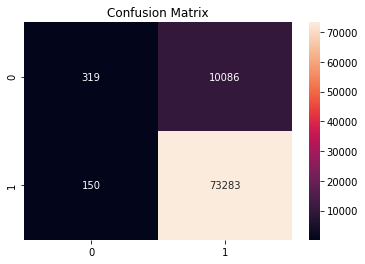

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
ypred = logreg.predict(X_test)
con_mat = confusion_matrix(y_test, ypred)
sns.heatmap(con_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [127]:
print("\nClassification Report: \n",(classification_report(y_test, ypred)))


Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.03      0.06     10405
           1       0.88      1.00      0.93     73433

    accuracy                           0.88     83838
   macro avg       0.78      0.51      0.50     83838
weighted avg       0.85      0.88      0.83     83838



ROC AUC = 0.83111006798438


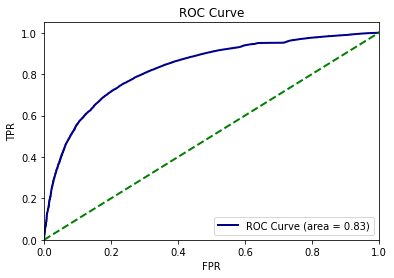

In [130]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = logreg.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkblue',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='green',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_predict_rfc = rfc.predict(X_test)
acc_rfc_test = accuracy_score(y_test, y_predict_rfc)*100
print(f"Accuracy Score : {accuracy_score(y_test, y_predict_rfc) * 100:.2f} %","\n")
print(confusion_matrix(y_test, y_predict_rfc))
print("\nClassification Report: \n",(classification_report(y_test, y_predict_rfc)))

Accuracy Score : 89.86 % 

[[ 3844  6561]
 [ 1940 71493]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.37      0.47     10405
           1       0.92      0.97      0.94     73433

    accuracy                           0.90     83838
   macro avg       0.79      0.67      0.71     83838
weighted avg       0.88      0.90      0.89     83838



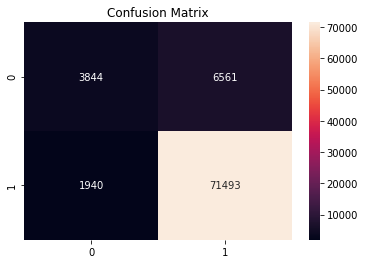

In [140]:
y_predict_rfc = rfc.predict(X_test)
con_mat = confusion_matrix(y_test, y_predict_rfc)
sns.heatmap(con_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter Tunning

In [154]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import model_selection
RF_var=[]
for val in np.arange(1,50):
  RF = RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(RF, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  RF_var.append(np.var(cv_results,ddof=1))

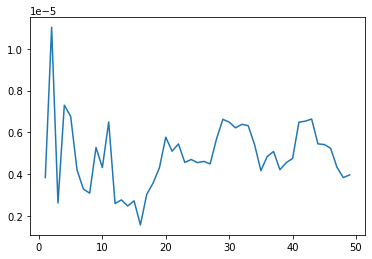

In [156]:
x_axis = np.arange(1,50)
plt.plot(x_axis,RF_var)

In [157]:
np.argmin(RF_var)

15

In [158]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=49,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [159]:
Predict = RF.predict(X_test)

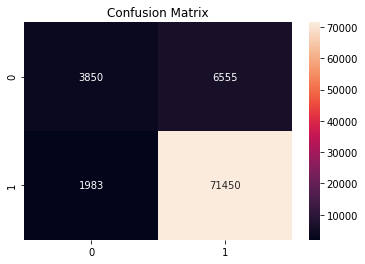

In [161]:
cm = confusion_matrix(y_test, Predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [162]:
print("\nClassification Report: \n",(classification_report(y_test, y_predict_rfc)))


Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.37      0.47     10405
           1       0.92      0.97      0.94     73433

    accuracy                           0.90     83838
   macro avg       0.79      0.67      0.71     83838
weighted avg       0.88      0.90      0.89     83838



ROC AUC = 0.8381927062437502


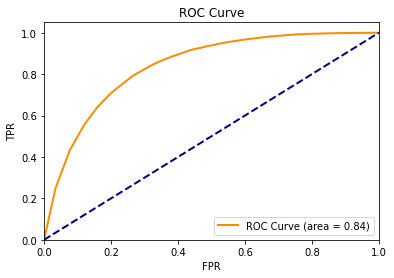

In [163]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Result of random forest classifier is better than logistic regression so we will save its pikle file for future referance.

In [164]:
import joblib
joblib.dump(RF,"Micro_Credit_rfc.pkl")

['Micro_Credit_rfc.pkl']